## Regressao Linear 02

### Disciplina Inteligência Artificial

Neste jupyter vamos criar um modelo de regressão linear para estimar o valor de um imóvel na cidade de Boston (EUA)

Dataset: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html


## Carregando e Explorando o Dataset

In [ ]:
# Carregando o Dataset Boston Houses a partir do pacote sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [ ]:
# Convertendo o dataset para um DataFrame com Pandas
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target

In [ ]:
# Vamos conhecer seu conteúdo
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Vamos explorar os dados de resultado
# Calculando a média da variável target
media_esperada = df['target'].mean()
media_esperada

22.532806324110698

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26ba268f60>]],
      dtype=object)

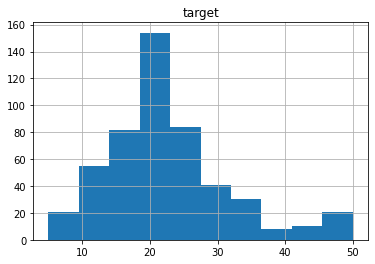

In [ ]:
# Histograma do target
df.hist(column='target')

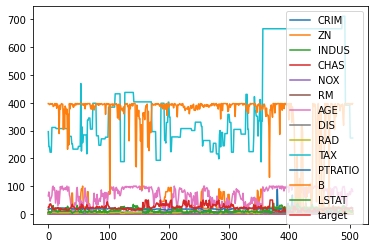

In [ ]:
# Vamos plotar o DataFrame para ver se encontramos alguma correlação entre as variáveis que determinam o resultado
df.plot()

Não foi possível encontrar uma relação. Vamos tentar de outra forma

In [ ]:
# Primeiro devemos separar as variáveis (X) do resultado (y)
X = df.iloc[:,:-1]
y = df['target'].values

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Uma forma de escolher uma variável para fazer a correlação é utilizando o pacote statsmodel.
# Vamos agora calcular a covariância entre as variáveis
import statsmodels.regression.linear_model as sm

modelo_v1 = sm.OLS(y, X)
modelo_v2 = modelo_v1.fit()
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Mon, 16 Nov 2020   Prob (F-statistic):                        0.00
Time:                        23:51:11   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Explicação dos dados acima:

* std err: O erro padrão básico da estimativa do coeficiente. 
* t: O valor da estatística t. Esta é uma medida de quão estatisticamente significativo é o coeficiente.
* P> | t |: P-valor de que a hipótese nula de que o coeficiente = 0 é verdadeira. Se for menor que o nível de confiança, geralmente 0,05, indica que há uma relação estatisticamente significativa entre o termo e a resposta.

Baseado no valor de (P>|t|) < 0.05, vemos que as variáveis RM, DIS, PTRATIO, B, LSTAT tem alta influência no resultado


Baseado em (t), vemos que o termo mais significante é RM 

In [ ]:
# Gerando a matriz de correlação entre as variáveis
X = df.iloc[:,:-1]
matriz_corr = X.corr()
print (matriz_corr)

             CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
CRIM     1.000000 -0.200469  0.406583  ...  0.289946 -0.385064  0.455621
ZN      -0.200469  1.000000 -0.533828  ... -0.391679  0.175520 -0.412995
INDUS    0.406583 -0.533828  1.000000  ...  0.383248 -0.356977  0.603800
CHAS    -0.055892 -0.042697  0.062938  ... -0.121515  0.048788 -0.053929
NOX      0.420972 -0.516604  0.763651  ...  0.188933 -0.380051  0.590879
RM      -0.219247  0.311991 -0.391676  ... -0.355501  0.128069 -0.613808
AGE      0.352734 -0.569537  0.644779  ...  0.261515 -0.273534  0.602339
DIS     -0.379670  0.664408 -0.708027  ... -0.232471  0.291512 -0.496996
RAD      0.625505 -0.311948  0.595129  ...  0.464741 -0.444413  0.488676
TAX      0.582764 -0.314563  0.720760  ...  0.460853 -0.441808  0.543993
PTRATIO  0.289946 -0.391679  0.383248  ...  1.000000 -0.177383  0.374044
B       -0.385064  0.175520 -0.356977  ... -0.177383  1.000000 -0.366087
LSTAT    0.455621 -0.412995  0.603800  ...  0.37404

Não está fácil de ver a correlação na planilha acima. Vamos adicionar tudo em um gráfico com cor

In [ ]:
# Criando uma função para plotar a correlação entre as variáveis
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = False, top = False, left = False, right = False) 
    plt.colorbar()
    plt.show()

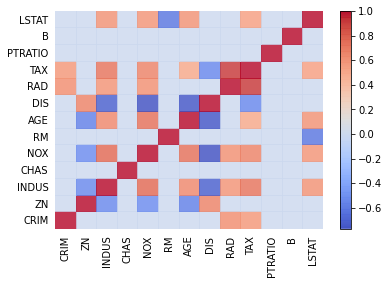

In [ ]:
# Visualizando o Plot
# Gerando número de observações e variáveis
observations = len(df)
variables = df.columns[:-1]
visualize_correlation_matrix(X, hurdle = 0.5)

Vemos na tabela acima que as variáveis RM, B e PTRATIO não possui correlação com outras variáveis, de forma que podemos analisá-las em separado.  

Como RM tem a maior significância, vamos utilizá-la para tentar explicar a relação com o resultado em uma regressão linear simples

## Regressão Linear com 1 variável

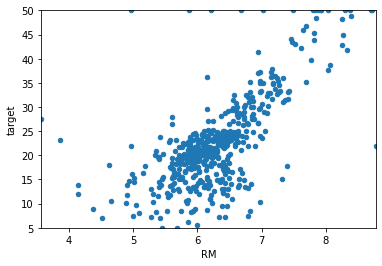

In [ ]:
# Vamos agora imprimir um scatter plot entre RM e o resultado (target)
# Definindo o range dos valores de x e y
VAR = 'RM'
TARGET = 'target'
x_range = [df[VAR].min(), df[VAR].max()]
y_range = [df[TARGET].min(), df[TARGET].max()]

# Plot dos valores de x e y com a média
scatter_plot = df.plot(kind = 'scatter', x = VAR, y = TARGET, xlim = x_range, ylim = y_range)

In [ ]:
# Define os valores de X e y
num_observ = len(df)
X_1 = df[VAR].values.reshape((num_observ, 1)) 
y = df[TARGET].values 

In [ ]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_1 , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (404, 1)
y_train: (404,)
X_test: (102, 1)
y_test: (102,)


In [ ]:
# Importando a biblioteca
from sklearn import linear_model
# Cria o objeto
lin_reg = linear_model.LinearRegression()

# Treina o modelo - fit()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Imprime os coeficientes
print (lin_reg.coef_)
print (lin_reg.intercept_)

[9.39289524]
-36.66357314722494


In [ ]:
# prevendo valores para X_test
y_pred = lin_reg.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (102,)


In [ ]:
# Medidas de desempenho
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error (MSE):",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_pred,y_test))
print("Score R2:",r2_score(y_pred,y_test))

Mean Squared Error (MSE): 49.359238697733865
Mean Absolute Error (MAE): 4.538993630294772
Score R2: -0.23000278585467582


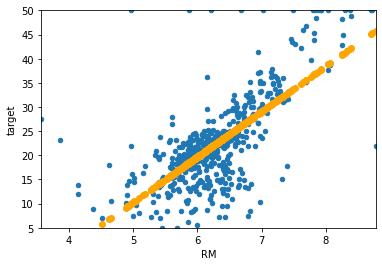

In [ ]:
# Plotando a linha de regressão para todos os dados

# Prevendo os valores de y para todos os dados
y_pred_all = lin_reg.predict(X_1)

# Primeira camada do Scatter Plot
scatter_plot = df.plot(kind = 'scatter', x = VAR, y = TARGET, xlim = x_range, ylim = y_range)

# Segunda camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(df[VAR], y_pred_all, 'o', color = 'orange', linewidth = 2)

Veja que a regressão linear não é perfeita perto dos dados reais, mas apenas uma aproximação.
Vamos ver mais adiante que existem formas estatísticas mais precisas para resolver esse e outros problemas  

# Exercício 02 (Aula05_Parte1)

Adicione novas células de código abaixo e implemente um modelo de Regressão Linear que utilize mais variáveis do dataset para prever a variável TARGET.

Crie também uma célula de código para imprimir os valores de MSE, MAE e R2

Finalmente, crie uma célula de Texto para responder se o resultado foi melhor ou pior.

Obs: Antes de entregar seu notebook, verifique se o mesmo está funcionando adequadamente com o menu "Ambiente de Execução > Reiniciar e executar tudo".

Salve o arquivo .ipynb com a opção "Arquivo > Fazer download do .ipynb" e poste pelo Ulife

In [ ]:
# Vamos agora imprimir um scatter plot entre RM e o resultado (target)
# Definindo o range dos valores de x e y
VAR = ['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','LSTAT','RM','PTRATIO','B']
X_2 = X[VAR].values.reshape((len(df),13))
print(X_2.shape)

(506, 13)


In [ ]:
# Define os valores de X e y
num_observ = len(df)
X_1 = df[VAR].values.reshape((num_observ, 13)) 
y = df[TARGET].values

In [ ]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_1 , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (404, 13)
y_train: (404,)
X_test: (102, 13)
y_test: (102,)


In [ ]:
# Importando a biblioteca
from sklearn import linear_model
# Cria o objeto
lin_reg = linear_model.LinearRegression()

# Treina o modelo - fit()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Imprime os coeficientes
print (lin_reg.coef_)
print (lin_reg.intercept_)

[-1.04683734e-01  3.94173679e-02  5.97497992e-02  8.49189549e-01
 -2.11417205e+01  6.15729868e-03 -1.45337348e+00  2.97609192e-01
 -1.36194161e-02 -4.77003618e-01  4.18935210e+00 -1.09117880e+00
  7.84352525e-03]
38.316117166413804


In [ ]:
# prevendo valores para X_test
y_pred = lin_reg.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (102,)


In [ ]:
# Medidas de desempenho
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error (MSE):",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_pred,y_test))
print("Score R2:",r2_score(y_pred,y_test))

Mean Squared Error (MSE): 26.345537363312996
Mean Absolute Error (MAE): 3.4021092754056066
Score R2: 0.525721003340482


In [ ]:
# Plotando a linha de regressão para todos os dados

# Prevendo os valores de y para todos os dados
y_pred_all = lin_reg.predict(X_1)

# Segunda camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(df[VAR], y_pred_all, 'o', color = 'orange', linewidth = 2)

O modelo acima com o uso de uma variavel o resultado ficou pior poi o R2 ficou negativo. Já o uso com mais variaveis o resultado foi melhor e positivo.

FIM